In [3]:
import os.path
import numpy as np
import matplotlib.pylab as plt
from sklearn import gaussian_process
%matplotlib inline

In [7]:
# read POI data
sub_cats={};
poi=np.zeros([1500,6])
file_= [line.rstrip() for line in open('Final_POIs_cat.csv','rb')]
file_1=file_[0].split('\r');
for line in file_1[1:]:
    s_line=line.split(',');
    if(len(s_line[5])==0): 
        continue;
    poi[int(s_line[5]),int(s_line[1])-1]=poi[int(s_line[5]),int(s_line[1])-1]+1;
   
    

In [13]:
#Data Parsing reading inflow data
flow=np.zeros([1500,1500]);
distance=np.zeros([1500,1500]);
length=0;
for i in range(1,1400):
    print i
    f_name=u'inflow/{}.txt'.format(i);
    if(not os.path.isfile(f_name) ):      
        continue;
    length+=1;
    alist = [line.rstrip() for line in open(f_name)]
    for o in alist[1:]:
        s_line=[float(t) for t in o.split(',')];
        if(s_line[2]!=0):
            flow[i,s_line[0]]=flow[i,s_line[0]]+s_line[2];
            if distance[i,s_line[0]]==0:
                distance[i,s_line[0]]=s_line[5];
        
        
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [8]:
#write for the od file
nz=np.transpose(np.nonzero(flow))
f_name='ods.txt';
X=np.zeros ([502313  ,7]);
Y=np.zeros([502313  ,1]);
file_out=open(f_name,'w');
i=0;
for t in nz:
    file_out.writelines("{},{},{},{},{},{},{},{},{},{}\n".format(t[0],t[1] \
    ,distance[t[0],t[1]],\
    #,poi[t[0],0],poi[t[0],1],poi[t[0],2],\
    #poi[t[0],3],poi[t[0],4],poi[t[0],5],
    poi[t[1],0],poi[t[1],1],poi[t[1],2],\
    poi[t[1],3],poi[t[1],4],poi[t[1],5],flow[t[0],t[1]]));
    X[i]=[distance[t[0],t[1]],poi[t[1],0],poi[t[1],1],poi[t[1],2],\
    poi[t[1],3],poi[t[1],4],poi[t[1],5]]
    Y[i]=[flow[t[0],t[1]]];
    i=i+1;

In [21]:
#write for the od file
nz=np.transpose(np.nonzero(flow))
f_name='flows.txt';
inflow=np.zeros ([502313  ,7]);
Y=np.zeros([502313  ,1]);
file_out=open(f_name,'w');
i=0;
for t in nz:
    file_out.writelines("{},{},{},{}\n".format(t[0],t[1] ,flow[t[0],t[1]],distance[t[0],t[1]]));

In [ ]:
#subtype section

In [90]:
# read POI sub_data
sub_cats={};
subcat_ind=1;
sub_poi=np.zeros([1500,100])
file_= [line.rstrip() for line in open('Final_POIs_cat.csv','rb')]
file_1=file_[0].split('\r');
for line in file_1[1:]:
    s_line=line.split(',');
    if(s_line[2] not in sub_cats.keys()):
        sub_cats[s_line[2]]=subcat_ind;
        subcat_ind+=1;
    if(s_line[2]==''):
        continue;
        
    if(len(s_line[5])==0): 
        continue;
    sub_poi[int(s_line[5]),sub_cats[s_line[2]]]=sub_poi[int(s_line[5]),sub_cats[s_line[2]]]+1;
   
    

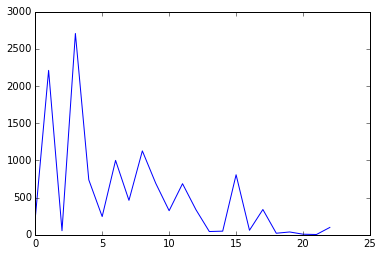

In [114]:
plt.plot(np.sum(sub_poi[:,1:24],0))

array([  215.,  2210.,    55.,  2706.,   739.,   245.,  1000.,   463.,
        1128.,   692.,   324.,   687.,   338.,    44.,    49.,   807.,
          61.,   340.,    21.,    38.,     8.,     4.,    99.])

In [121]:
#merge into bigger clusters
#first read cluster assignments
file_cluster=open('/Users/fha/Desktop/6.882/project/gpml-matlab-v3.6-2015-07-07/data/cluster_assigns.csv','r');
c_assigns={};
ind=1;
for i in file_cluster.readlines():
        c_assigns[ind]=int(i.rstrip());
        ind+=1;

In [144]:
#write for the od file with subtypes
nz=np.transpose(np.nonzero(flow))
f_name='ods_subtypes.csv';
X=np.zeros ([502313  ,7]);
Y=np.zeros([502313  ,1]);
file_out=open(f_name,'w');
c=0;
file_out.writelines("ind,c_o,c_d,taz_o,taz_d,distance,")
for i in range(0,24): file_out.writelines("poi_o_{},".format(i)) ;
for i in range(0,24): file_out.writelines("poi_d_{},".format(i)) ;
file_out.writelines("flow\n")

ind=1;
for t in nz:
    file_out.writelines("{},{},{},{},{},{},".format(ind,c_assigns[t[0]],c_assigns[t[1]],t[0],t[1],distance[t[0],t[1]]));
    for i in range(0,24):
        file_out.writelines("{},".format(sub_poi[t[0],i]));
    for i in range(0,24):
        file_out.writelines("{},".format(sub_poi[t[1],i]));
    file_out.writelines("{}\n".format(flow[t[0],t[1]]))
    c=c+1;
    ind+=1;

In [145]:
import pandas as pd
#aggregate through pandas
df=pd.read_csv('ods_subtypes.csv')

In [152]:
df

,ind,c_o,c_d,taz_o,taz_d,distance,poi_o_0,poi_o_1,poi_o_2,poi_o_3,poi_o_4,poi_o_5,poi_o_6,poi_o_7,poi_o_8,poi_o_9,poi_o_10,poi_o_11,poi_o_12,poi_o_13,
0,1,64,64,1,2,149.387831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
1,2,64,7,1,31,587.594986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
2,3,64,69,1,73,61.639738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
3,4,64,29,1,136,763.934604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
4,5,64,47,1,163,323.819220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
5,6,64,22,1,242,184.199831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
6,7,64,22,1,257,351.367503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
7,8,64,36,1,567,28.861017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
8,9,64,19,1,658,17.745866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
9,10,64,96,1,687,46.659646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...


In [157]:
df1=df.groupby(['c_o','c_d'])['distance'].mean()
df.groupby(['c_o','c_d']).apply(lambda subf: subf['tag'][subf['count'].idxmax()])

c_o  c_d
1    1      479.953178
     2      171.109320
     3      140.083458
     4      112.043576
     5       87.866482
     6      239.094782
     7      269.726420
     8      155.998982
     9      166.008768
     10     316.600084
     11     487.353731
     12     265.782342
     13     520.594860
     14     138.315680
     15     133.326646
...
101  87     105.856195
     88      97.436660
     89     187.658230
     90      98.360793
     91      84.368245
     92     398.774456
     93     347.744658
     94     105.460937
     95      85.404242
     96     144.157696
     97     156.824341
     98     232.544192
     99     263.317856
     100    106.035681
     101     55.908319
Name: distance, Length: 10053, dtype: float64

In [70]:
#read od file and store in a list
data=np.zeros([480,10])
file_=open('ods.txt','r')
ind=0;
for i in file_.readlines():
    z=[float(t) for t in i.split(',')]
    if(z[0]==2):
        data[ind,:]=[float(t) for t in i.split(',')]
        ind+=1;
print ind

480


In [74]:
plt.plot(data[:,9])
plt.show()

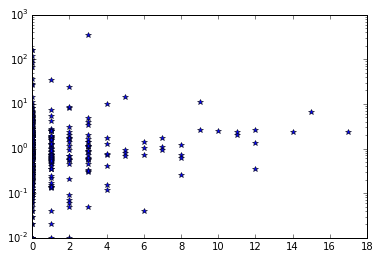

In [81]:
plt.semilogy(data[:,3],data[:,9],'*')

(array([ 397.,   49.,   12.,    4.,    7.,    3.,    2.,    3.,    2.,    1.]),
 array([  0. ,   1.7,   3.4,   5.1,   6.8,   8.5,  10.2,  11.9,  13.6,
         15.3,  17. ]),
 <a list of 10 Patch objects>)

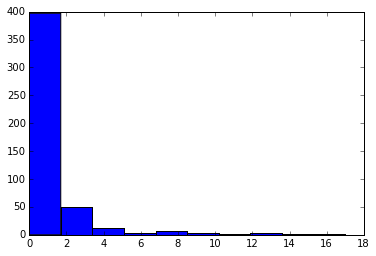

In [82]:
plt.hist(data[:,3])

In [22]:
a=np.zeros([2,2])
a[1,:]=[1,2]
a
data[0,:]=z
data[0,:]

array([   1.        ,    2.        ,  149.38783091,    2.        ,
         19.        ,    6.        ,    1.        ,    3.        ,
         22.        ,    4.82      ])

In [ ]:
#def f(x):
#    return np.sin(x)
#X = np.array([ [2.,1.],[6.,1.],[10.,1.]])
#y=np.array([1,2,2])
gp = gaussian_process.GaussianProcess(theta0=1, thetaL=1e-2, thetaU=0.6,verbose=True)
gp.fit(X, Y)  




In [146]:
y_pred, sigma2_pred = gp.predict([2,1], eval_MSE=True)
print y_pred, sigma2_pred

[ 1.] [  6.44611841e-16]


In [20]:
distance_file=open('distance.csv','w')
for i in range(1,1500):
    for j in range(1,1500):
        if(distance[i,j]!=0):
            distance_file.writelines('{},{},{}\n'.format(i,j,distance[i,j]));

array([[  2.,   6.,  10.],
       [  1.,   1.,   1.]])

In [ ]:
y_pred, sigma2_pred = gp.predict(x, eval_MSE=True)

fig = plt.figure(figsize=(10, 10))

plt.plot(X, y, '*', label=u'$f(x) =\sin(x)$')
#pl.errorbar(x, y_pred, sigma2_pred, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma2_pred,
                       (y_pred + 1.9600 * sigma2_pred)[::-1]]),
        alpha=.5, fc='g', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.xlim(-50,12)
plt.legend(loc='upper right')

plt.show()